In [7]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## TASK : Price Elasticity Model Development
Prepare Data for Modeling:
Extract relevant features (e.g., price, attendance) and handle any necessary transformations.


Build the Model:
Use regression techniques to build a price elasticity model, such as using StatsModels or scikit-learn for regression analysis.


Validate the Model:
Assess model performance using metrics like R-squared, Mean Squared Error (MSE), and by checking residual plots.



In [4]:
final_df = pd.read_csv('final_df.csv', index_col=['Unnamed: 0'])

In [5]:
final_df.head()

,ActivitySiteID,BookingEndDateTime,Number Booked,Price (INR)
0,1,2018-04-08,-0.593867,-1.692847
1,1,2018-04-15,-0.282487,-1.692847
2,1,2018-04-22,-0.386280,-1.692847
3,1,2018-04-29,-0.905246,-1.692847
4,1,2018-05-06,-1.112833,-1.692847


In [14]:
# Add a constant term for the intercept
X = sm.add_constant(final_df['Price (INR)'])
y = final_df['Number Booked']

# Build the regression model
model = sm.OLS(y, X).fit()

# Get the model summary
model_summary = model.summary()

# Predict the values
y_pred = model.predict(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Display model summary and MSE
model_summary, mse


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          Number Booked   R-squared:                       0.038
 Model:                            OLS   Adj. R-squared:                  0.038
 Method:                 Least Squares   F-statistic:                     127.9
 Date:                Tue, 02 Jul 2024   Prob (F-statistic):           4.11e-29
 Time:                        18:39:20   Log-Likelihood:                -4433.4
 No. Observations:                3253   AIC:                             8871.
 Df Residuals:                    3251   BIC:                             8883.
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------------------------------------------------

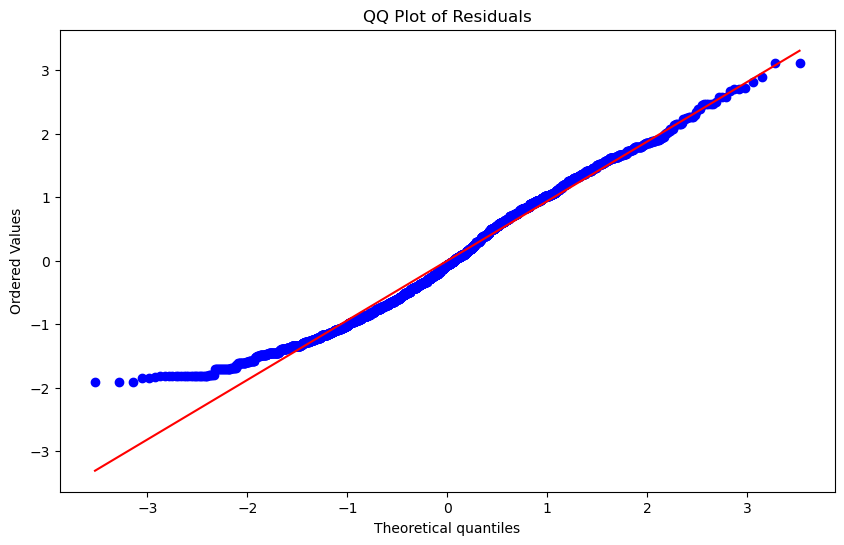

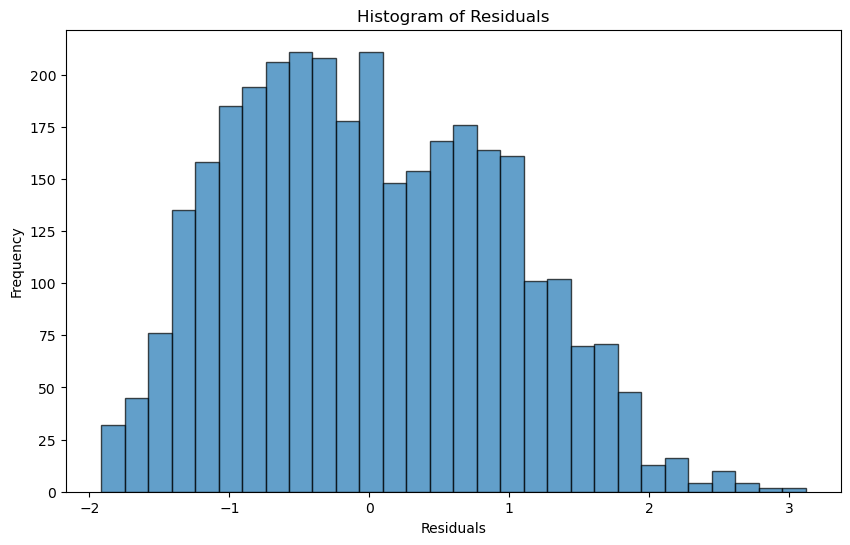

In [16]:
import scipy.stats as stats

# QQ plot for residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
